### Imoprting Libraries 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

### Dataset And Description  

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
df.columns = map(str.lower, df.columns) #maping the columns to lowercase 

In [5]:
df['year'].unique()

array([2019], dtype=int64)

In [6]:
df = df.drop(['id','year'],axis=1) #dropping the unnecessary values 

In [7]:
df.shape

(148670, 32)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   credit_worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   rate_of_interest           112231 non-null  float64
 10  interest_rate_spread       112031 non-null  float64
 11  upfront_charges            109028 non-null  float64
 12  term                       148629 non-null  float64
 13  neg_ammortization          14

In [9]:
df.dtypes

loan_limit                    object
gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
credit_worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
interest_rate_spread         float64
upfront_charges              float64
term                         float64
neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
secured_by                    object
total_units                   object
income                       float64
credit_type                   object
credit_score                   int64
co-applicant_credit_type      object
age                           object
submission_of_application     object
l

In [10]:
df.describe()

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
count,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [11]:
df.columns

Index(['loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'secured_by', 'total_units', 'income', 'credit_type',
       'credit_score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'ltv', 'region', 'security_type', 'status',
       'dtir1'],
      dtype='object')

#### Column Description 

In [12]:
#ID = Customer ID of Applicant
#loan limit = maximum avaliable amount of the loan allowed to be taken
#Gender = sex type
#approv_in_adv = Is loan pre-approved or not
#loan_type = Type of loan
#loan_purpose = the reason you want to borrow money
#Credit_Worthiness = is how a lender determines that you will default on your debt obligations, or how worthy you are to receive new credit.
#open_credit = is a pre-approved loan between a lender and a borrower. It allows the borrower to make repeated withdrawals up to a certain limit.
#business_or_commercial = Usage type of the loan amount
#loan_amount = The exact loan amount
#rate_of_interest = is the amount a lender charges a borrower and is a percentage of the principal—the amount loaned.
#Interest_rate_spread = the difference between the interest rate a financial institution pays to depositors and the interest rate it receives from loans
#Upfront_charges = Fee paid to a lender by a borrower as consideration for making a new loan
#term = the loan's repayment period
#Neg_ammortization = refers to a situation when a loan borrower makes a payment less than the standard installment set by the bank.
#interest_only = amount of interest only without principles
#lump_sum_payment = is an amount of money that is paid in one single payment rather than in installments.
#property_value = the present worth of future benefits arising from the ownership of the property
#construction_type = Collateral construction type
#occupancy_type = classifications refer to categorizing structures based on their usage
#Secured_by = Type of Collatoral
#total_units = number of unites
#income = refers to the amount of money, property, and other transfers of value received over a set period of time
#credit_type = type of credit
#co-applicant_credit_type = is an additional person involved in the loan application process. Both applicant and co-applicant apply and sign for the loan
#age = applicant's age
#submission_of_application = Ensure the application is complete or not
#LTV = life-time value (LTV) is a prognostication of the net profit
#Region = applicant's place
#Security_Type = Type of Collatoral
#status = Loan status (Approved/Declined)
#dtir1 = debt-to-income ratio


##### categorical and Numerical columns 

In [13]:
df_num = df.select_dtypes(include =['float','int'])

In [14]:
df_cat = df.select_dtypes(include =['object'])

### Exploratoy Data Analysis  

##### Distribution of Target Variables 

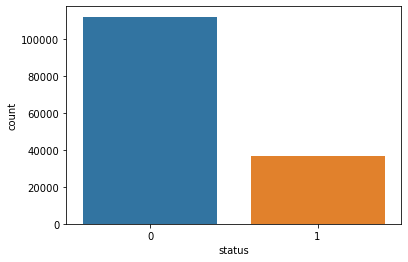

In [15]:
sns.countplot(data = df, x = 'status')
plt.show()

In [16]:
df['status'].value_counts()

0    112031
1     36639
Name: status, dtype: int64

##### Distribution of Fatures with Target Variables 

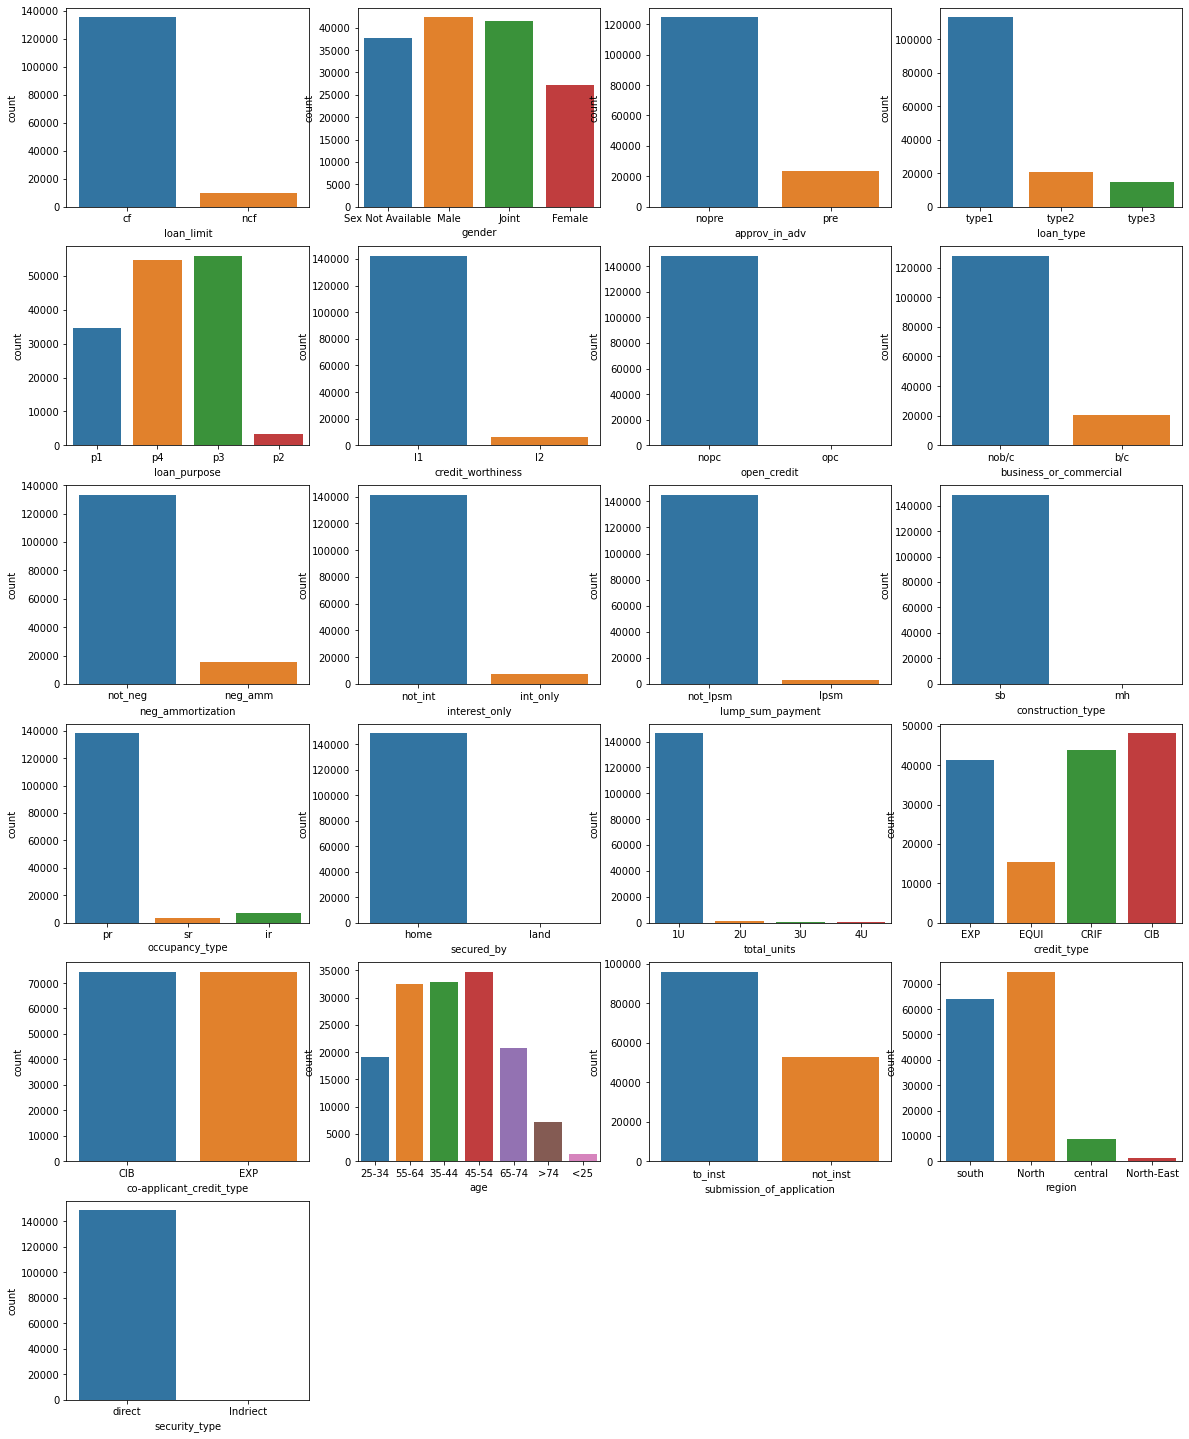

In [17]:
plt.figure(figsize=(20,30))

for i,col in enumerate(df_cat):
    plt.subplot(7,4,i+1)
    sns.countplot(data=df,x=col)

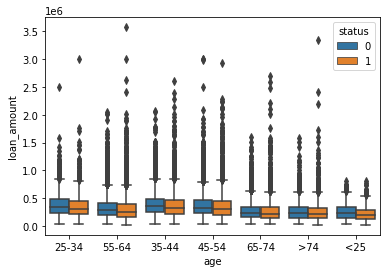

In [18]:
sns.boxplot(data=df , x='age' , y ='loan_amount' , hue='status')
plt.show()
#outliers present

<AxesSubplot:xlabel='rate_of_interest', ylabel='income'>

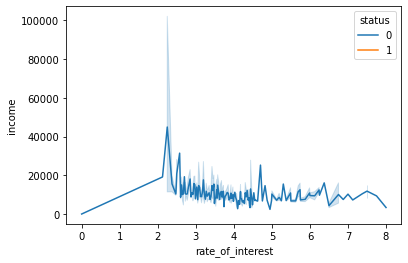

In [19]:
sns.lineplot(data=df, x="rate_of_interest", y="income", hue="status")

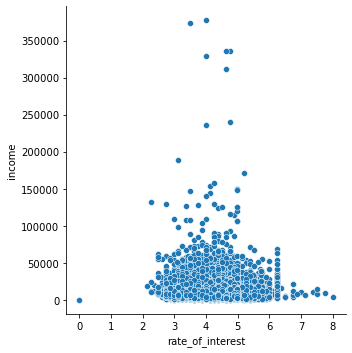

In [20]:
sns.relplot(x ="rate_of_interest", y ="income",data = df)

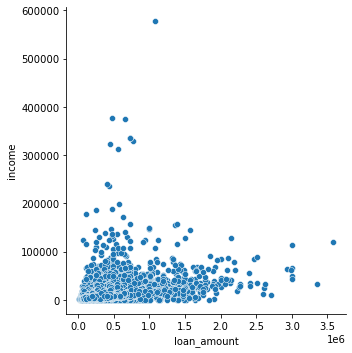

In [21]:
sns.relplot(x ="loan_amount", y ="income",data = df)

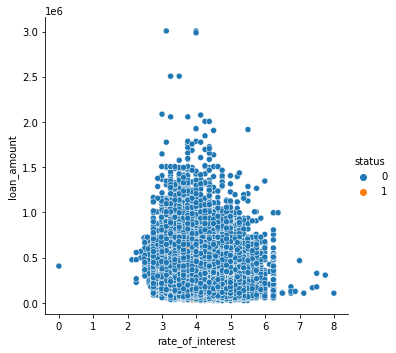

In [22]:
sns.relplot(x ="rate_of_interest", y ="loan_amount", hue='status' ,data = df)

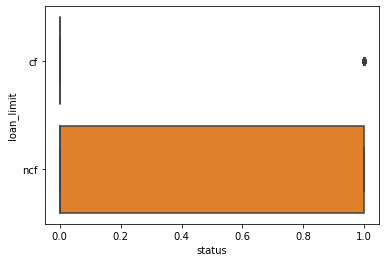

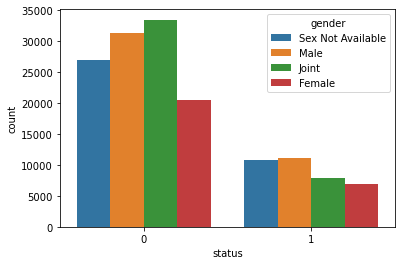

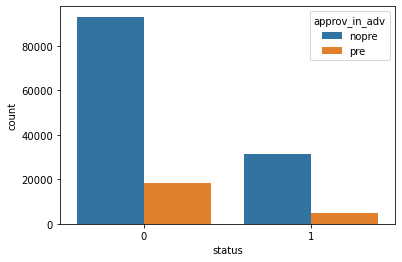

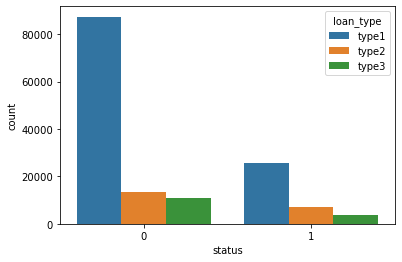

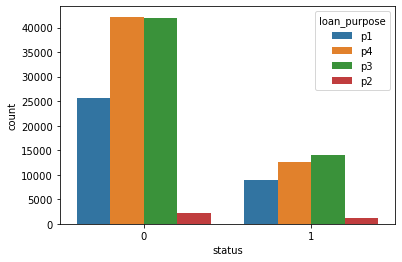

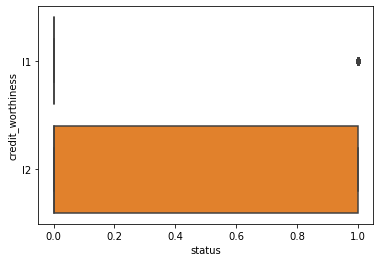

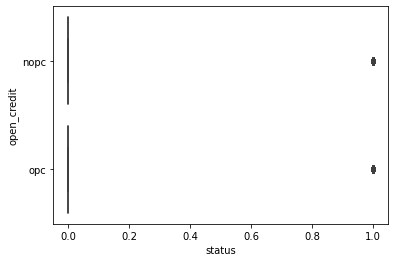

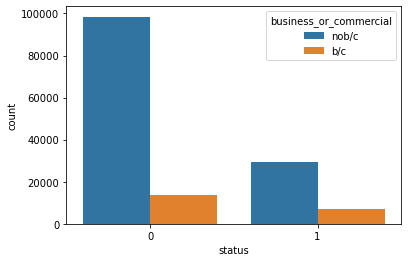

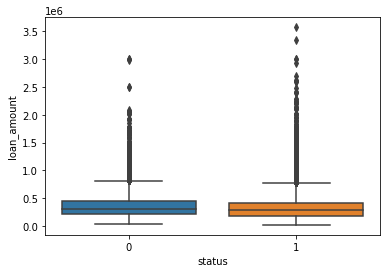

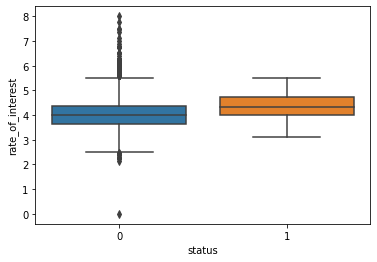

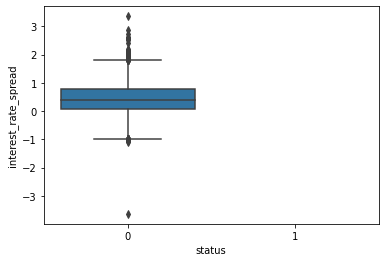

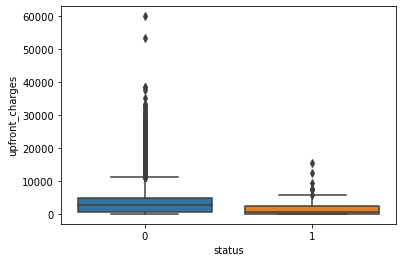

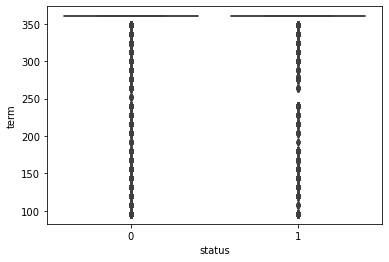

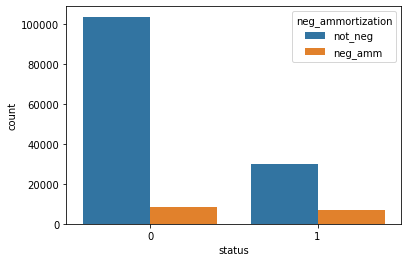

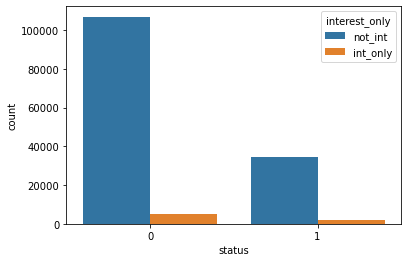

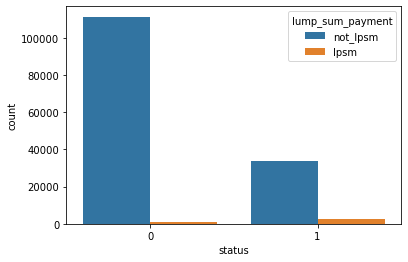

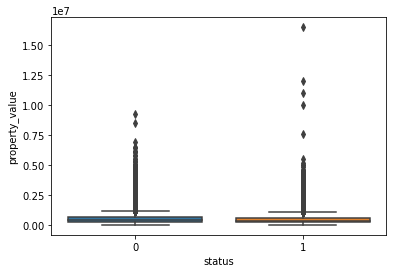

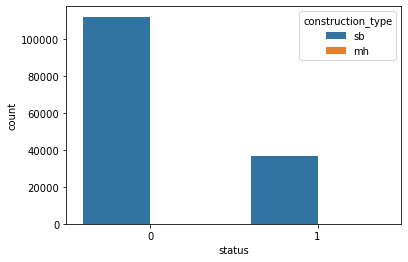

<function matplotlib.pyplot.show(close=None, block=None)>

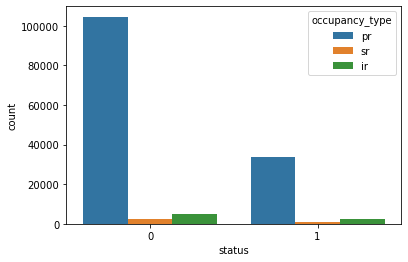

In [23]:
# Loan limit
sns.boxplot(data=df, x='status', y='loan_limit')
plt.show()

# Gender
sns.countplot(data=df, x='status', hue='gender')
plt.show()

# Approval in advance
sns.countplot(data=df, x='status', hue='approv_in_adv')
plt.show()

# Loan type
sns.countplot(data=df, x='status', hue='loan_type')
plt.show()

# Loan purpose
sns.countplot(data=df, x='status', hue='loan_purpose')
plt.show()

# Credit worthiness
sns.boxplot(data=df, x='status', y='credit_worthiness')
plt.show()

# Open credit
sns.boxplot(data=df, x='status', y='open_credit')
plt.show()

# Business or commercial
sns.countplot(data=df, x='status', hue='business_or_commercial')
plt.show()

# Loan amount
sns.boxplot(data=df, x='status', y='loan_amount')
plt.show()

# Rate of interest
sns.boxplot(data=df, x='status', y='rate_of_interest')
plt.show()

# Interest rate spread
sns.boxplot(data=df, x='status', y='interest_rate_spread')
plt.show()

# Upfront charges
sns.boxplot(data=df, x='status', y='upfront_charges')
plt.show()

# Term
sns.boxplot(data=df, x='status', y='term')
plt.show()

# Negative amortization
sns.countplot(data=df, x='status', hue='neg_ammortization')
plt.show()

# Interest only
sns.countplot(data=df, x='status', hue='interest_only')
plt.show()

# Lump sum payment
sns.countplot(data=df, x='status', hue='lump_sum_payment')
plt.show()

# Property value
sns.boxplot(data=df, x='status', y='property_value')
plt.show()

# Construction type
sns.countplot(data=df, x='status', hue='construction_type')
plt.show()

# Occupancy type
sns.countplot(data=df, x='status', hue='occupancy_type')
plt.show


In [24]:
# Create a contingency table between Gender and Status
for col in df_cat:
    contingency_table = pd.crosstab(df_cat[col], df['status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("Column name: ", col)
    print("Chi-square statistic: ", chi2)
    print("P-value: ", p)


Column name:  loan_limit
Chi-square statistic:  427.3984867633947
P-value:  5.9856473342233624e-95
Column name:  gender
Chi-square statistic:  1043.6008495787444
P-value:  6.260048330360408e-226
Column name:  approv_in_adv
Chi-square statistic:  206.4015716506725
P-value:  8.374762938602453e-47
Column name:  loan_type
Chi-square statistic:  1309.9581425319489
P-value:  3.5172528245408e-285
Column name:  loan_purpose
Chi-square statistic:  240.21381947971778
P-value:  8.555939611317916e-52
Column name:  credit_worthiness
Chi-square statistic:  180.42067395127427
P-value:  3.922570041932154e-41
Column name:  open_credit
Chi-square statistic:  14.426760138640278
P-value:  0.00014571689037135412
Column name:  business_or_commercial
Chi-square statistic:  1272.8079977681857
P-value:  9.172191110452255e-279
Column name:  neg_ammortization
Chi-square statistic:  3610.2081036515697
P-value:  0.0
Column name:  interest_only
Chi-square statistic:  28.494732092138246
P-value:  9.395377090231088e-

In [25]:
#loan_limit, gender, loan_type, business_or_commercial, neg_ammortization, lump_sum_payment, credit_type, co-applicant_credit_type, submission_of_application, and region

In [26]:
df = df.drop(['open_credit','construction_type','occupancy_type', 
              'secured_by', 'total_units','security_type'],axis=1)#dropping this as of this doesnt provides much with target 

#### Correlation Matrix 

In [27]:
corr_matrix = df_num.corr()
corr_matrix

,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,property_value,income,credit_score,ltv,status,dtir1
loan_amount,1.000000,-0.150844,-0.377272,0.065556,0.174474,0.734249,0.456065,0.004438,0.038869,-0.036825,0.015029
rate_of_interest,-0.150844,1.000000,0.614908,-0.076473,0.209330,-0.122613,-0.041809,-0.001331,-0.000220,0.022957,0.055124
interest_rate_spread,-0.377272,0.614908,1.000000,0.033037,-0.157139,-0.334571,-0.151333,-0.001738,0.040257,NaN,0.078178
upfront_charges,0.065556,-0.076473,0.033037,1.000000,-0.054960,0.053043,0.016580,-0.001484,-0.031347,-0.019138,0.000115
term,0.174474,0.209330,-0.157139,-0.054960,1.000000,0.045117,-0.053785,-0.003149,0.106834,-0.000240,0.110572
property_value,0.734249,-0.122613,-0.334571,0.053043,0.045117,1.000000,0.414883,0.002430,-0.215102,-0.048864,-0.056288
income,0.456065,-0.041809,-0.151333,0.016580,-0.053785,0.414883,1.000000,0.000802,-0.066203,-0.065119,-0.267807
credit_score,0.004438,-0.001331,-0.001738,-0.001484,-0.003149,0.002430,0.000802,1.000000,-0.005533,0.004004,-0.000313
ltv,0.038869,-0.000220,0.040257,-0.031347,0.106834,-0.215102,-0.066203,-0.005533,1.000000,0.038895,0.156557
status,-0.036825,0.022957,NaN,-0.019138,-0.000240,-0.048864,-0.065119,0.004004,0.038895,1.000000,0.078083


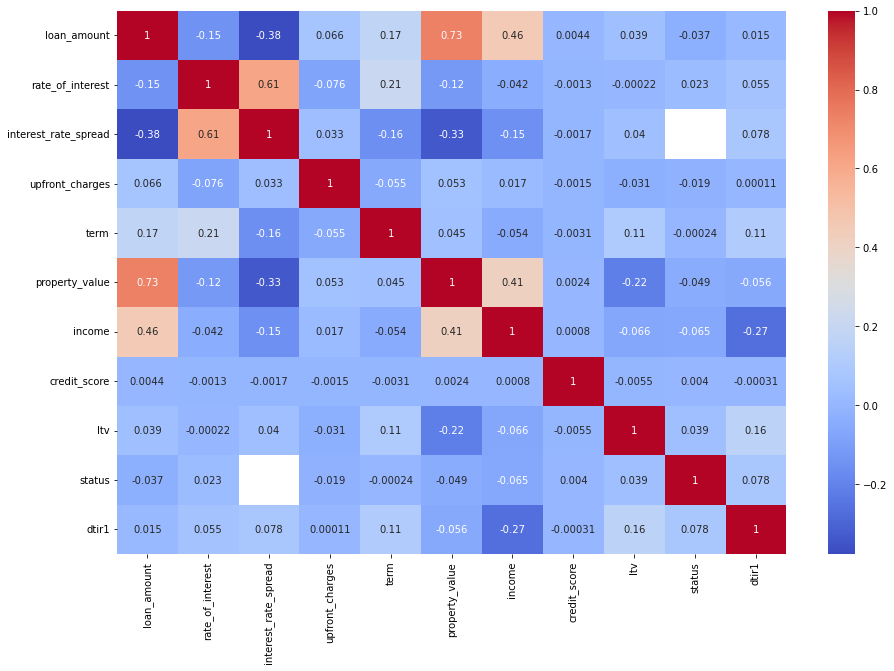

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

In [29]:
#Keep variables with a high correlation with the target variable (status), such as loan_amount, property_value, and income.
#Drop variables that are highly correlated with each other, such as loan_amount and property_value (due to their high correlation of 0.69), or interest_rate_spread and rate_of_interest (correlation of 0.61).
#Drop variables that are not relevant to the research question or have a low correlation with the target variable, such as credit_score or dtir1.

In [30]:
df = df.drop(['interest_rate_spread','rate_of_interest',],axis=1)

###   Preprocessing 

#### Missing Values Handling   

In [31]:
df.isnull().sum()

loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
business_or_commercial           0
loan_amount                      0
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_application      200
ltv                          15098
region                           0
status                           0
dtir1                        24121
dtype: int64

In [32]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        if df[col].isnull().sum() > 0:
            if df[col].skew() > 0.5:
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna(df[col].mean())

In [33]:
df.isnull().sum()

loan_limit                   0
gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
business_or_commercial       0
loan_amount                  0
upfront_charges              0
term                         0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
income                       0
credit_type                  0
credit_score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
ltv                          0
region                       0
status                       0
dtir1                        0
dtype: int64

#### Handling Outliers 

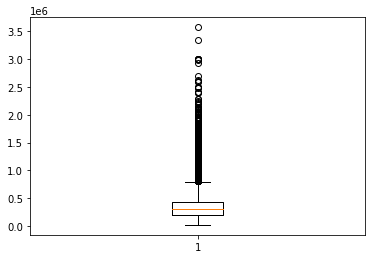

In [34]:
plt.boxplot(df['loan_amount'])
plt.show()

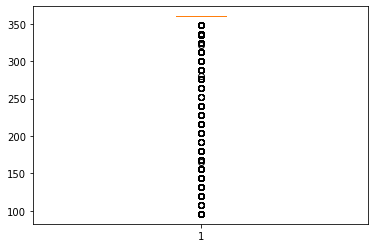

In [35]:
plt.boxplot(df['term'])
plt.show()

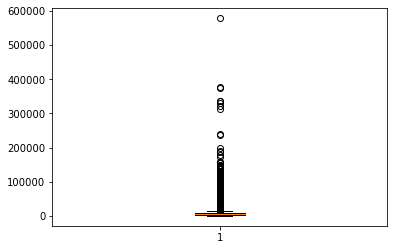

In [36]:
plt.boxplot(df['income'])
plt.show()

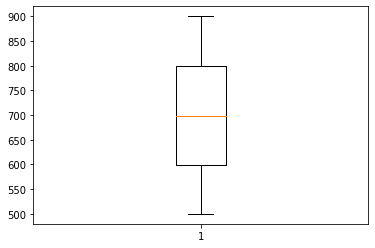

In [37]:
plt.boxplot(df['credit_score'])
plt.show()

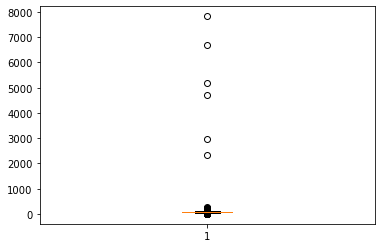

In [38]:
plt.boxplot(df['ltv'])
plt.show()

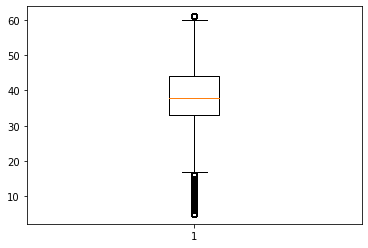

In [39]:
plt.boxplot(df['dtir1'])
plt.show()

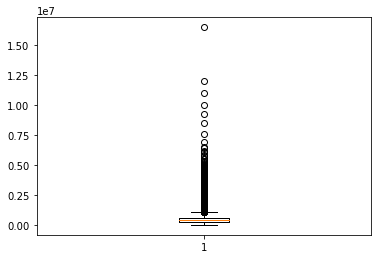

In [40]:
plt.boxplot(df['property_value'])
plt.show()

In [41]:
#define a function called 'outliers' which returns a list of index of outliers
def outliers(df,ft):
    Q1 = np.percentile(df[ft], 25,interpolation = 'midpoint')
    Q3 = np.percentile(df[ft], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    low_limit =  Q1-1.5*IQR
    up_limit = Q3+1.5*IQR
    
    ls = df.index[(df[ft]<low_limit) | (df[ft]>up_limit)]
    
    return ls

In [42]:
#create an empty list to store the output indices from multiple rows
index_list = []
for feature in ['loan_amount','dtir1','income','credit_score','ltv','property_value']:
    index_list.extend(outliers(df,feature))

In [43]:
#define a function called 'remove' which returns a cleaned dataframe without outliers
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df


In [44]:
df = remove(df,index_list)

In [45]:
df.shape

(129451, 24)

### Feature Engineering  

In [46]:
df['loan_limit'].unique()

array(['cf', 'ncf'], dtype=object)

In [47]:
df['gender'].unique()

array(['Sex Not Available', 'Male', 'Joint', 'Female'], dtype=object)

In [48]:
df['approv_in_adv'].unique()

array(['nopre', 'pre'], dtype=object)

In [49]:
df['loan_type'].unique()

array(['type1', 'type2', 'type3'], dtype=object)

In [50]:
df['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2'], dtype=object)

In [51]:
df['credit_worthiness'].unique()

array(['l1', 'l2'], dtype=object)

In [52]:
df['business_or_commercial'].unique()

array(['nob/c', 'b/c'], dtype=object)

In [53]:
df['neg_ammortization'].unique()

array(['not_neg', 'neg_amm'], dtype=object)

In [54]:
df['interest_only'].unique()

array(['not_int', 'int_only'], dtype=object)

In [55]:
df['lump_sum_payment'].unique()

array(['not_lpsm', 'lpsm'], dtype=object)

In [56]:
df['credit_type'].unique()

array(['EXP', 'EQUI', 'CRIF', 'CIB'], dtype=object)

In [57]:
df['co-applicant_credit_type'].unique()

array(['CIB', 'EXP'], dtype=object)

In [58]:
df['age'].unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25'],
      dtype=object)

In [59]:
df['submission_of_application'].unique()

array(['to_inst', 'not_inst'], dtype=object)

In [60]:
df['region'].unique()

array(['south', 'North', 'central', 'North-East'], dtype=object)

In [61]:
df['loan_limit'] = df['loan_limit'].map({'cf':0, 'ncf':1}).astype('int')
df['gender'] = df['gender'].map({'Sex Not Available':0, 'Male':1,'Joint':2,'Female':3}).astype('int')
df['approv_in_adv'] = df['approv_in_adv'].map({'nopre':0, 'pre':1}).astype('int')
df['loan_type'] = df['loan_type'].map({'type1':0, 'type2':1,'type3':2}).astype('int')
df['loan_purpose'] = df['loan_purpose'].map({'p1':0,'p2':1,'p3':2,'p4':3}).astype('int')
df['credit_worthiness'] = df['credit_worthiness'].map({'l1':0, 'l2':1}).astype('int')
df['business_or_commercial'] = df['business_or_commercial'].map({'nob/c':0, 'b/c':1}).astype('int')
df['neg_ammortization'] = df['neg_ammortization'].map({'not_neg':0, 'neg_amm':1}).astype('int')
df['interest_only'] = df['interest_only'].map({'not_int':0, 'int_only':1}).astype('int')
df['lump_sum_payment'] = df['lump_sum_payment'].map({'not_lpsm':0, 'lpsm':1}).astype('int')
df['credit_type'] = df['credit_type'].map({'EXP':0, 'EQUI':1,'CRIF':2,'CIB':3}).astype('int')
df['co-applicant_credit_type'] = df['co-applicant_credit_type'].map({'CIB':0, 'EXP':1}).astype('int')
df['age'] = df['age'].map({'<25':0,'25-34':1,'35-44':2,'45-54':3,'55-64':4,'65-74':5,'>74':6}).astype('int')
df['submission_of_application'] = df['submission_of_application'].map({'to_inst':0, 'not_inst':1}).astype('int')
df['region'] = df['region'].map({'south':0,'North':1,'central':2,'North-East':3}).astype('int')

In [62]:
df.head()

,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,business_or_commercial,loan_amount,upfront_charges,term,...,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,status,dtir1
0,0,0,0,0,0,0,0,116500,2596.45,360.0,...,1740.0,0,758,0,1,0,98.728814,0,1,45.000000
1,0,1,0,1,0,0,1,206500,2596.45,360.0,...,4980.0,1,552,1,4,0,75.135870,1,1,37.732932
2,0,1,1,0,0,0,0,406500,595.00,360.0,...,9480.0,0,834,0,2,0,80.019685,0,0,46.000000
3,0,1,0,0,3,0,0,456500,2596.45,360.0,...,11880.0,0,587,0,3,1,69.376900,1,0,42.000000
4,0,2,1,0,0,0,0,696500,0.00,360.0,...,10440.0,2,602,1,1,1,91.886544,1,0,39.000000


### Target and Feature Splitting  

In [63]:
X = df.drop('status',axis=1)

In [64]:
y = df['status']

### Data Balancing 

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [66]:
# Balance the target column using SMOTE
smote = SMOTE(random_state=42)
X_train,y_train = smote.fit_resample(X_train, y_train)

In [67]:
y_train.value_counts()

1    78000
0    78000
Name: status, dtype: int64

###  With scaling

#### Standard Scaling 

In [68]:
cols=['loan_amount','dtir1','term','income','credit_score','ltv','property_value']

In [69]:
st = StandardScaler()

In [70]:
X[cols]=st.fit_transform(X[cols])

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### Model Selection 

#### K Fold Cross Validation 

In [72]:
model_df={}
def model_val(model,X,y):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"{model} accuracy is{accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model}Avg cross val score is{np.mean(score)}")
    model_df[model]= round(np.mean(score)*100,2)

#### Logistic Regression 

In [73]:
model = LogisticRegression()
model_val(model,X,y)

C:\Users\FISAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() accuracy is0.7632768143370283


C:\Users\FISAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\FISAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression()Avg cross val score is0.7685455913244995


C:\Users\FISAL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier 

In [74]:
model = DecisionTreeClassifier() 
model_val(model,X,y)

DecisionTreeClassifier() accuracy is0.9659341083774284
DecisionTreeClassifier()Avg cross val score is0.9689921223806032


#### Random Forest Classifer 

In [75]:
model = RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is0.9806882700552315
RandomForestClassifier()Avg cross val score is0.9809194182599814


#### Gradient Boosting Classifier 

In [76]:
model = GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is0.9806110231354525
GradientBoostingClassifier()Avg cross val score is0.9810893677491782


### Hyper Tuning  

#### Logistic Regression  

In [77]:
log_reg_grid ={"C":np.logspace(-4,4,20),
              "solver":['liblinear']}

In [78]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),log_reg_grid, 
                   n_iter=20,cv=5,verbose=True)

In [79]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [80]:
rs_log_reg.best_score_

0.7718905386979097

In [81]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 545.5594781168514}

#### Random Forest 

In [82]:
RandomForestClassifier()

RandomForestClassifier()

In [83]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 20, 50,100],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

In [84]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_grid, 
                   n_iter=20,cv=5,verbose=True)

In [85]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': [50, 100, 200]},
                   verbose=True)

In [86]:
rs_rf.best_score_

0.9811279927008971

In [87]:
rs_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 20}

### Model Training  

In [88]:
X = df.drop('status',axis=1)

In [89]:
y = df['status']

In [95]:
rf = RandomForestClassifier(n_estimators= 100,min_samples_split= 2,
                            min_samples_leaf= 2,max_features= 'log2',max_depth= 20)

In [96]:
rf.fit(X,y)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=2)

In [97]:
import joblib
joblib.dump(rf,'loan_status_prediction_project.joblib')

['loan_status_prediction_project.joblib']

In [98]:
import joblib



model = RandomForestClassifier()
model.fit(X_train, y_train)
joblib.dump(model, 'model.joblib')

# Load the saved model
loaded_model = joblib.load('model.joblib')


In [99]:
import pickle


model = RandomForestClassifier()
model.fit(X_train, y_train)
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the saved model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
